### Binomial Option Pricing

#### Theory Behind the Binomial Model

The binomial option pricing model is a discrete-time approach to option valuation developed by Cox, Ross, and Rubinstein in 1979. It's particularly valuable because it provides an intuitive framework for understanding option pricing and can handle American-style options that can be exercised early.

##### Stock Price Movement: 
The model assumes that over each small time period, the stock price can only move to one of two possible values - up by a factor of $u$ or down by a factor of $d$. This creates a binary tree of possible stock prices over time.

##### Risk-Neutral Valuation: 
The key insight is that we can value options by assuming investors are risk-neutral and then discounting expected payoffs at the risk-free rate. This eliminates the need to know the actual probability of up/down movements or the required return on the stock.

##### Backward Induction: 
We start from the option's expiration date (where we know the payoff) and work backward through the tree, calculating the option's value at each node.

#### Key Assumptions:
- The option has a maturity of $T$ years.
- The stock price can move up by a factor $u$ or down by a factor $d$ in each time step.
- There is a risk-free interest rate $r$.
- No arbitrage: $d<e^{r \Delta t}<u$
- The probability of an "up" move under risk-neutral measure is:

\begin{equation*}
p=\frac{e^{r \Delta t}-d}{u-d}
\end{equation*}


##### 1. Time and Steps

Let:
- $T$ : Time to maturity (in years)
- $N$ : Number of time steps
- $\Delta t=\frac{T}{N}$ : Length of each time step
 
##### 2. Up and Down Factors

These define how the stock price changes at each step:

\begin{equation*}
\begin{aligned}
u & =e^{\sigma \sqrt{\Delta t}} \quad \text { (Up factor) } \\
d=\frac{1}{u} & =e^{-\sigma \sqrt{\Delta t}} \quad \text { (Down factor) }
\end{aligned}
\end{equation*}


Where:
- $\sigma$ is the volatility of the underlying asset.

This choice of $d=1 / u$ ensures the tree is recombining (i.e., paths converge to the same prices).

##### 3. Risk-Neutral Probability

The risk-neutral probability of an up move is:

\begin{equation*}
p=\frac{e^{r \Delta t}-d}{u-d}
\end{equation*}


Where:
- $r$ is the risk-free interest rate (annualized, continuously compounded)

This ensures that the expected return of the stock under this probability is the risk-free rate.

##### 4. Option Payoff at Maturity

At expiration ( $t=T$ ), the option value is simply its intrinsic value:

- For a Call Option:

\begin{equation*}
V=\max (S-K, 0)
\end{equation*}

- For a Put Option:

\begin{equation*}
V=\max (K-S, 0)
\end{equation*}


Where:
- $S$ is the stock price at expiration
- $K$ is the strike price

##### 5. Option Value at Earlier Nodes (Backward Induction)

At each prior node in the binomial tree, the option value is computed using risk-neutral valuation:

\begin{equation*}
V=e^{-r \Delta t} \times\left[p \cdot V_{\mathrm{up}}+(1-p) \cdot V_{\mathrm{down}}\right]
\end{equation*}


Where:
- $V_{\text {up }}$ is the option value at the up-node in the next time step
- $V_{\text {down }}$ is the value at the down-node
- $e^{-r \Delta t}$ discounts the expected value to the present

### Code - 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Option parameters
S0 = 100     # initial stock price
K = 100      # strike price
T = 1        # time to maturity (years)
r = 0.03     # risk-free rate
sigma = 0.2  # volatility
N = 3        # number of steps
option_type = "call"  # or "put"

# Derived parameters
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)
discount = np.exp(-r * dt)

print(f"u={u:.4f}, d={d:.4f}, p={p:.4f}")


u=1.1224, d=0.8909, p=0.5146


#### Create Stock Price Tree

In [5]:
# Build stock price tree
stock_tree = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

print("Stock Price Tree:")
print(np.round(stock_tree, 2))


Stock Price Tree:
[[100.   112.24 125.98 141.4 ]
 [  0.    89.09 100.   112.24]
 [  0.     0.    79.38  89.09]
 [  0.     0.     0.    70.72]]


#### Calculate Option Values at Maturity

In [6]:
# Option value at maturity
option_tree = np.zeros_like(stock_tree)
for j in range(N + 1):
    if option_type == "call":
        option_tree[j, N] = max(0, stock_tree[j, N] - K)
    else:
        option_tree[j, N] = max(0, K - stock_tree[j, N])


In [7]:
print(option_tree)

[[ 0.          0.          0.         41.39824581]
 [ 0.          0.          0.         12.24009024]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


#### Back Propagation

In [9]:
# Backward induction
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        option_tree[j, i] = discount * (
            p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
        )
print(f"Option Price: {option_tree[0,0]:.4f}")


Option Price: 10.0547


#### Plot

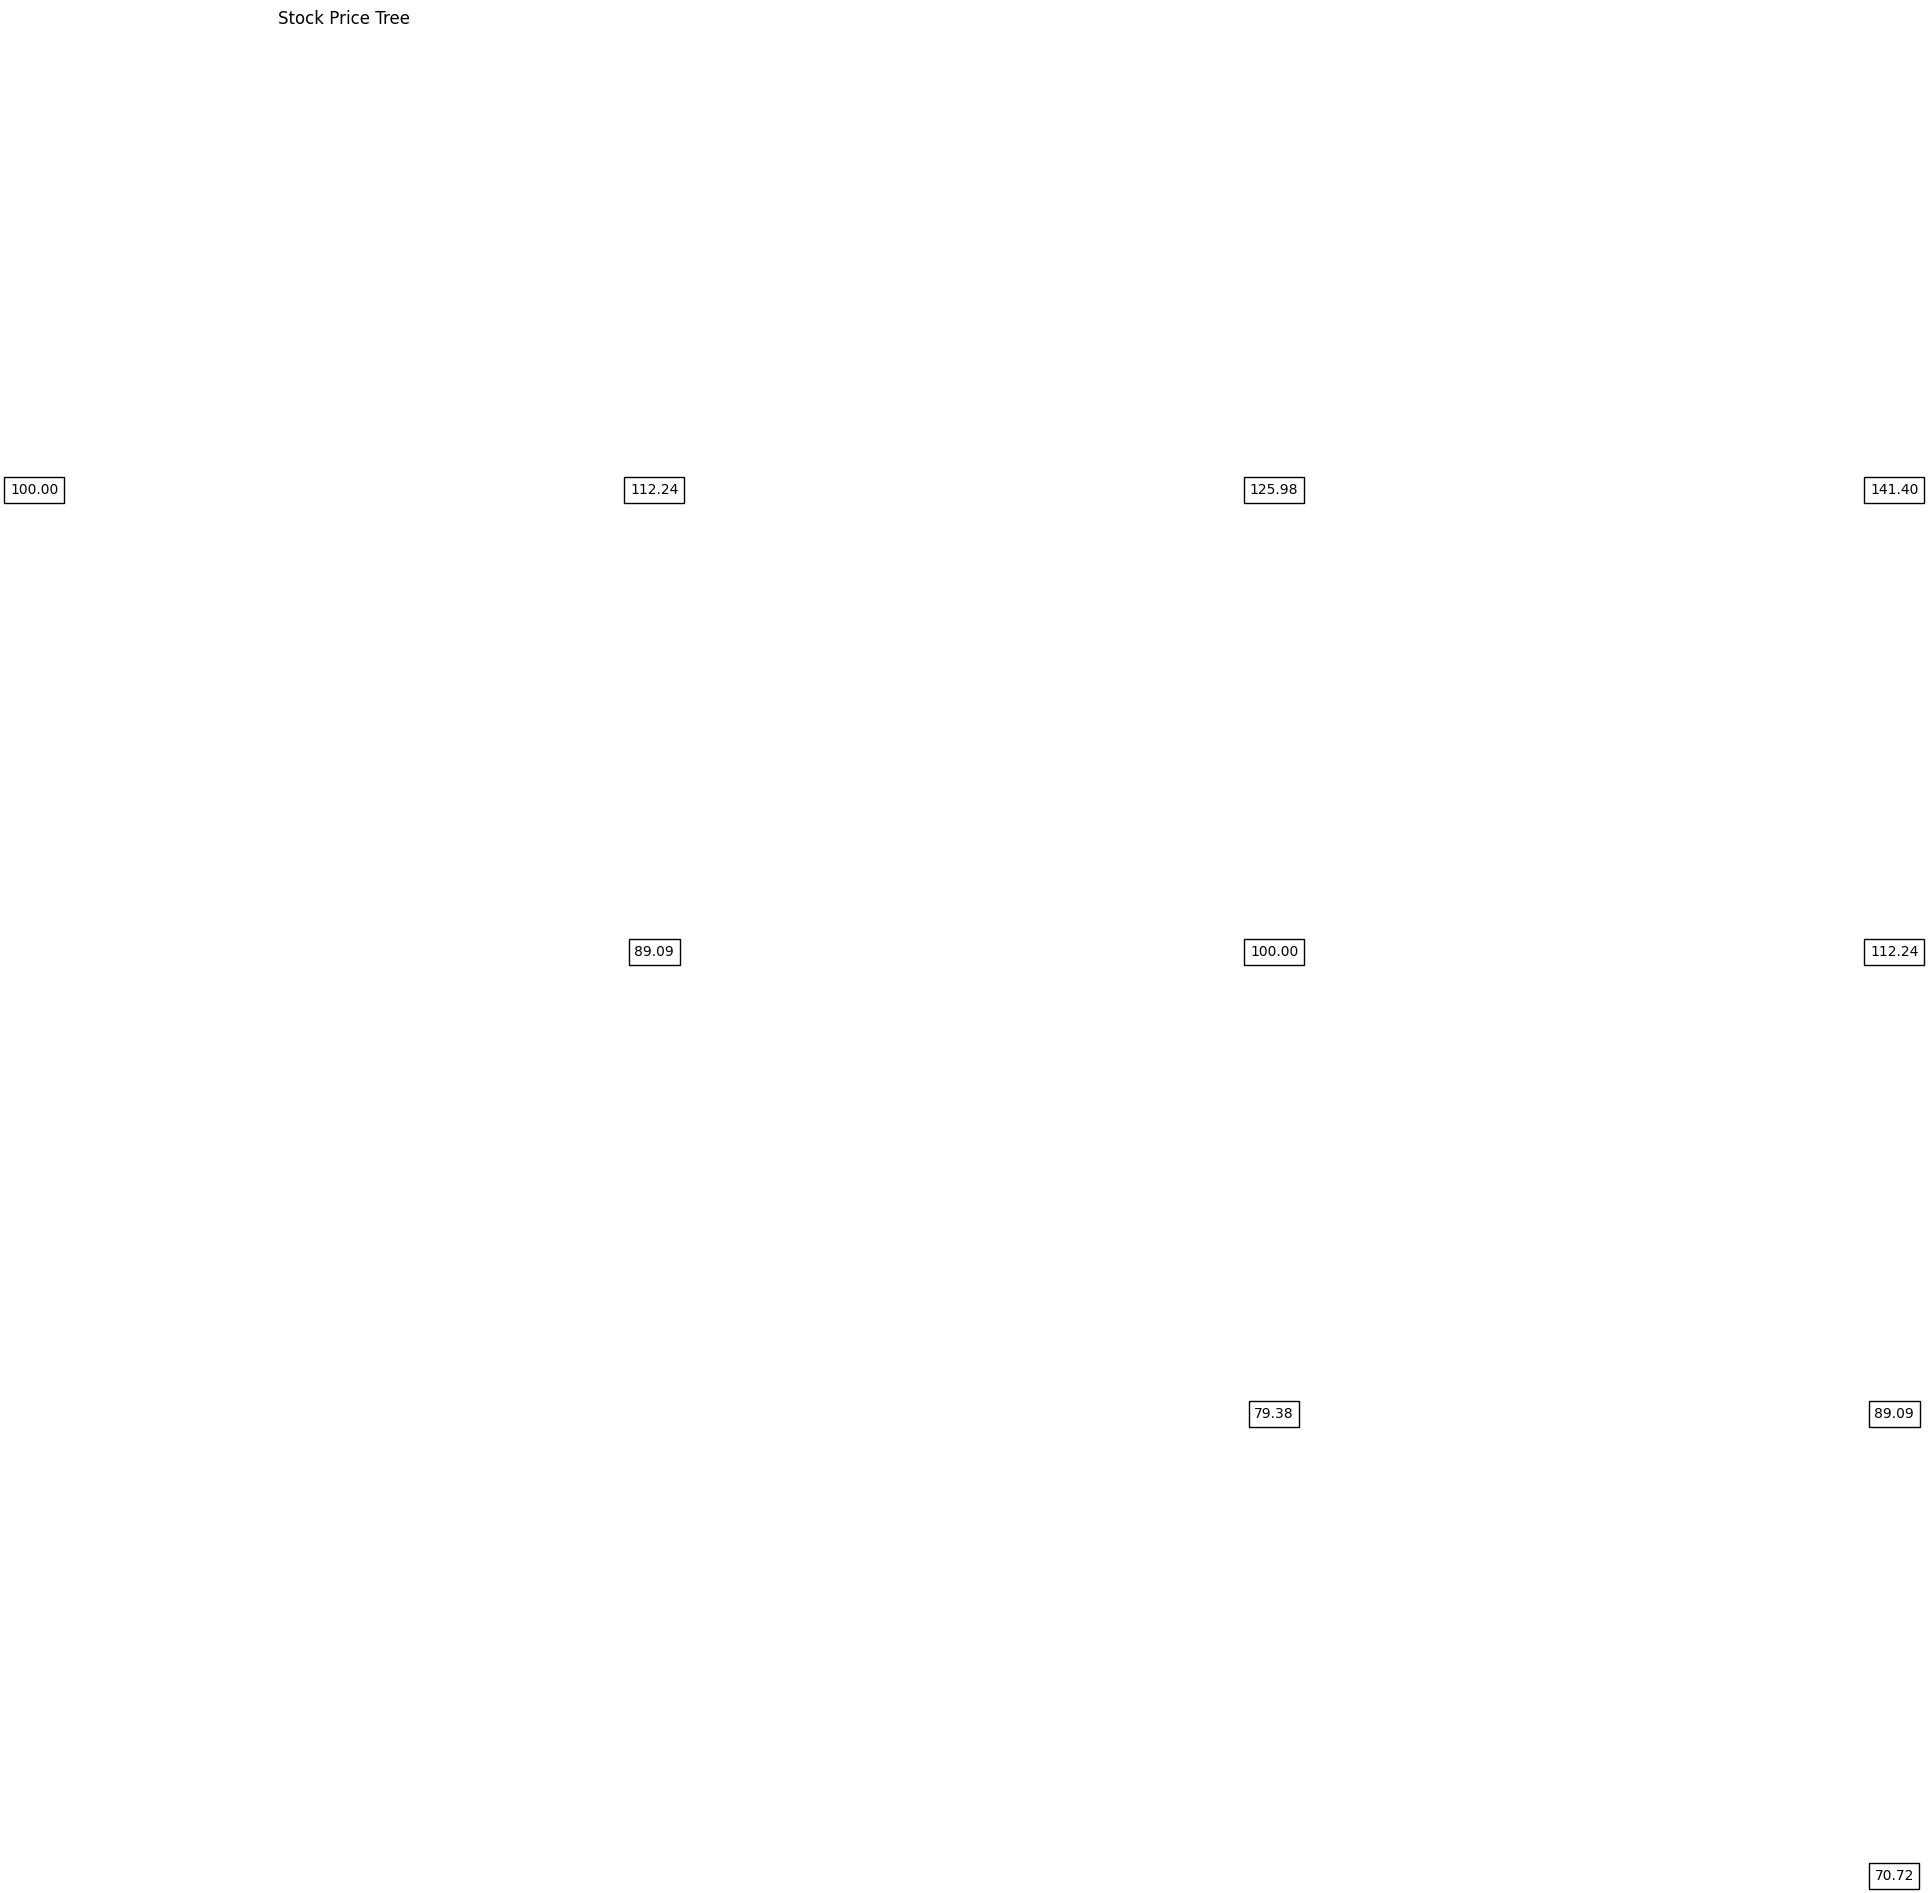

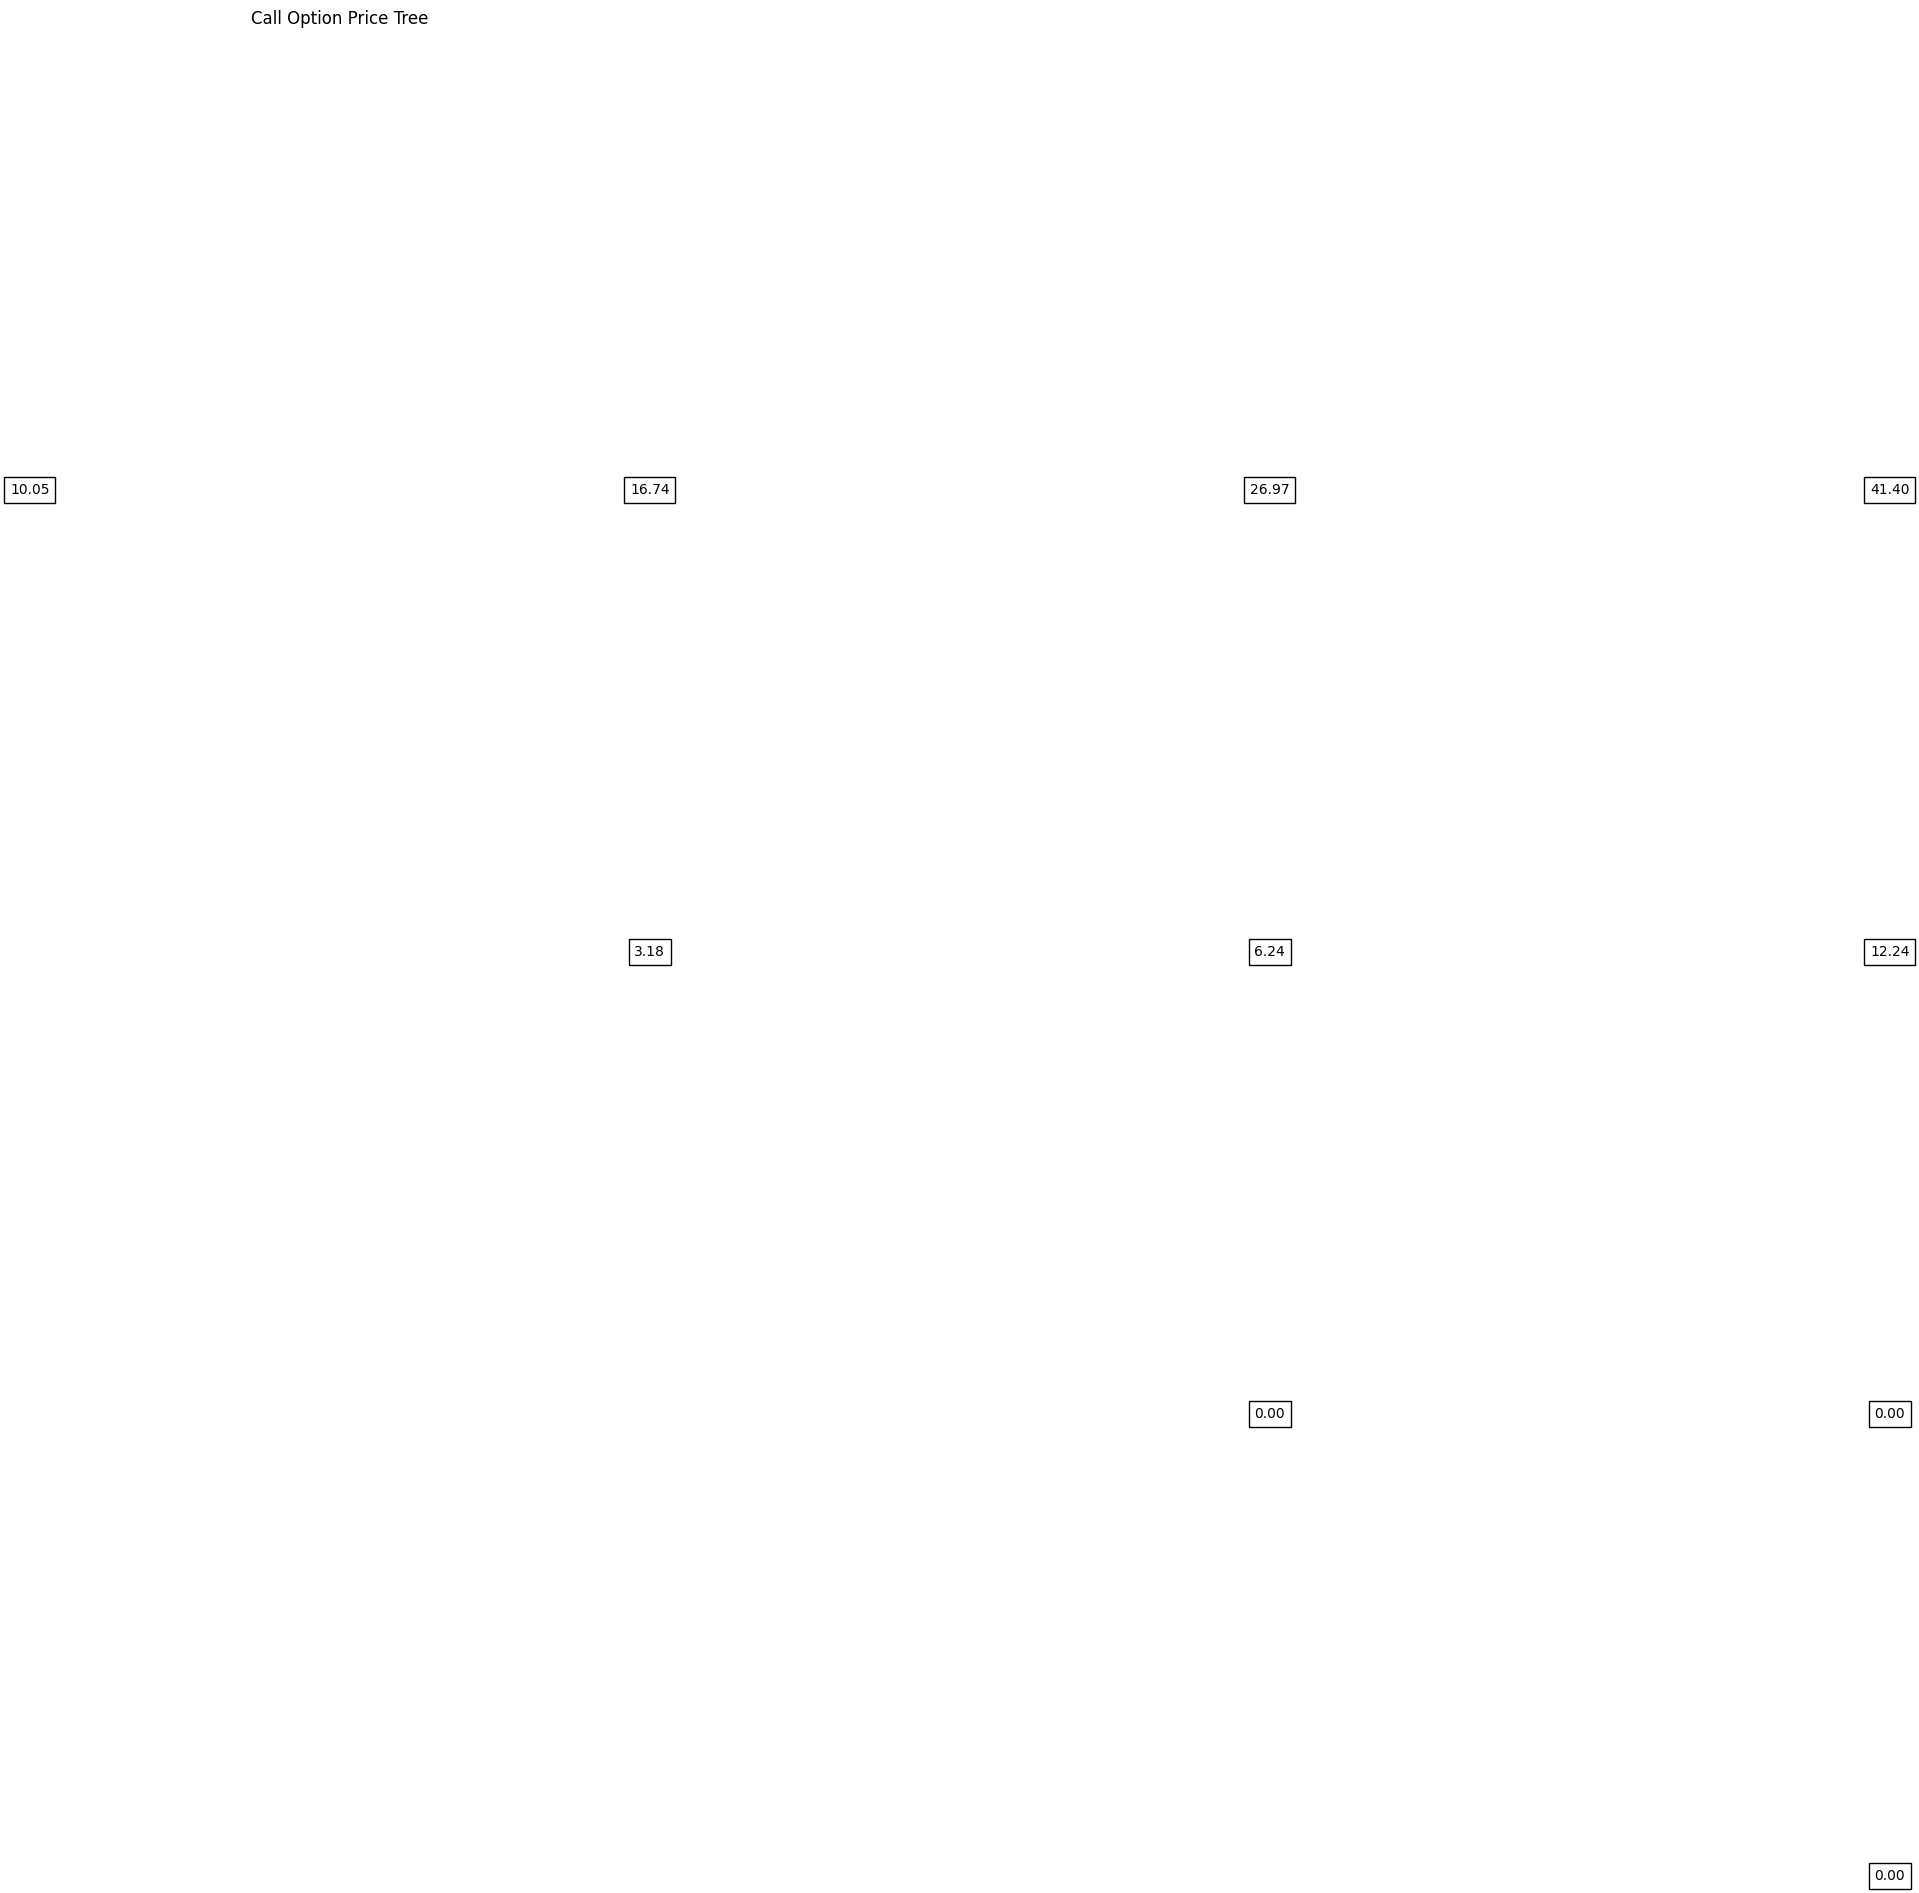

In [11]:
def plot_tree(tree, title):
    fig, ax = plt.subplots(figsize=(8,6))
    for i in range(tree.shape[1]):
        for j in range(i + 1):
            ax.text(i, -j, f"{tree[j, i]:.2f}", ha='center', bbox=dict(facecolor='white', edgecolor='black'))
    ax.set_title(title)
    ax.axis('off')
    plt.show()

plot_tree(stock_tree, "Stock Price Tree")
plot_tree(option_tree, f"{option_type.title()} Option Price Tree")


#### For Put

In [12]:
import numpy as np

# Parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity in years
r = 0.06        # Risk-free rate
sigma = 0.2     # Volatility
N = 3           # Number of time steps

# Time step size
dt = T / N

# Up and down factors
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

# Risk-neutral probability
p = (np.exp(r * dt) - d) / (u - d)
discount = np.exp(-r * dt)

# Build stock price tree
stock_tree = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

print("Stock Price Tree:")
print(np.round(stock_tree, 2))

# Option value at maturity (Put option)
option_tree = np.zeros_like(stock_tree)
for j in range(N + 1):
    option_tree[j, N] = max(0, K - stock_tree[j, N])

print("\nOption Payoff at Maturity (Put):")
print(np.round(option_tree, 2))

# Backward induction
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        option_tree[j, i] = discount * (
            p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
        )

print(f"\nPut Option Price: {option_tree[0, 0]:.4f}")


Stock Price Tree:
[[100.   112.24 125.98 141.4 ]
 [  0.    89.09 100.   112.24]
 [  0.     0.    79.38  89.09]
 [  0.     0.     0.    70.72]]

Option Payoff at Maturity (Put):
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.   10.91]
 [ 0.    0.    0.   29.28]]

Put Option Price: 5.7284


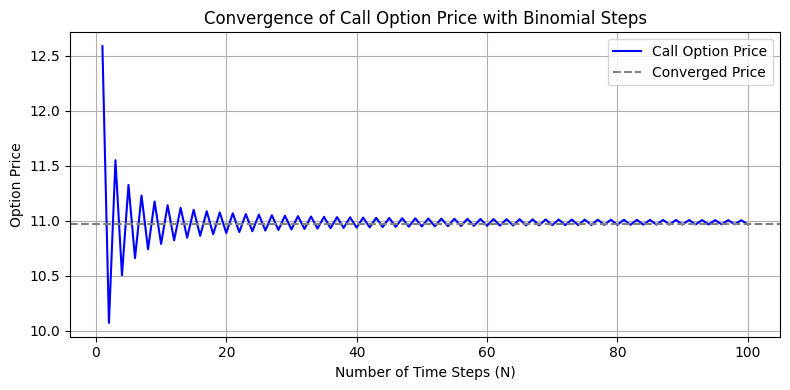

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity in years
r = 0.06        # Risk-free rate
sigma = 0.2     # Volatility
option_type = "call"  # "call" or "put"

def binomial_option_price(S0, K, T, r, sigma, N, option_type="call"):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Stock price tree
    stock_tree = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Option value at maturity
    option_tree = np.zeros_like(stock_tree)
    for j in range(N + 1):
        if option_type == "call":
            option_tree[j, N] = max(0, stock_tree[j, N] - K)
        else:
            option_tree[j, N] = max(0, K - stock_tree[j, N])

    # Backward induction
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = discount * (
                p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
            )

    return option_tree[0, 0]

# Calculate option price for increasing steps
steps = np.arange(1, 101)
prices = [binomial_option_price(S0, K, T, r, sigma, N, option_type) for N in steps]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(steps, prices, label=f'{option_type.capitalize()} Option Price', color='blue')
plt.axhline(y=prices[-1], color='gray', linestyle='--', label='Converged Price')
plt.title(f'Convergence of {option_type.capitalize()} Option Price with Binomial Steps')
plt.xlabel('Number of Time Steps (N)')
plt.ylabel('Option Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("p111.png",dpi=300)
plt.show()


### Test

In [62]:
import math  # We need this for mathematical functions like exp() and sqrt()

# These are the basic inputs we need to price an option
S0 = 100        # Current stock price ($100)
K = 100         # Strike price ($100) - price at which we can buy/sell
T = 0.25        # Time to expiration (0.25 years = 3 months)
r = 0.05        # Risk-free interest rate (5% per year)
sigma = 0.20    # Volatility (20% per year)
n = 7           # Number of time steps (keep small for now)

In [63]:
dt = T / n
print(f"Time step (dt) = {dt:.4f} years")

# Calculate up factor (u) - how much stock price goes up
u = math.exp(sigma * math.sqrt(dt))
print(f"Up factor (u)  = {u:.4f}")

# Calculate down factor (d) - how much stock price goes down
d = 1 / u
print(f"Down factor (d) = {d:.4f}")

# Calculate risk-neutral probability
p = (math.exp(r * dt) - d) / (u - d)
print(f"p  = {p:.4f}")

# Calculate discount factor
discount = math.exp(-r * dt)
print(f"Discount factor =  {discount:.4f}")
print()

print(f"• Each time step, stock can go UP by {(u-1)*100:.1f}% or DOWN by {(1-d)*100:.1f}%")
print(f"• Risk-neutral probability of going up: {p*100:.1f}%")
print(f"• Risk-neutral probability of going down: {(1-p)*100:.1f}%")
print()

Time step (dt) = 0.0357 years
Up factor (u)  = 1.0385
Down factor (d) = 0.9629
p  = 0.5142
Discount factor =  0.9982

• Each time step, stock can go UP by 3.9% or DOWN by 3.7%
• Risk-neutral probability of going up: 51.4%
• Risk-neutral probability of going down: 48.6%



In [64]:
stock_tree = np.zeros((n+1,n+1))
print(stock_tree)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [65]:
print("Calculating stock prices at each node...")
for step in range(n + 1):  # For each time step
    for node in range(step + 1):  # For each node at this time step
        # At each node: S0 × u^(up_moves) × d^(down_moves)
        stock_price = S0 * (u ** (step - node)) * (d ** node)
        stock_tree[node,step] = stock_price

print(stock_tree)

Calculating stock prices at each node...
[[100.         103.85198179 107.85234121 112.00679374 116.32127504
  120.80194936 125.45521845 130.28773061]
 [  0.          96.29089237 100.         103.85198179 107.85234121
  112.00679374 116.32127504 120.80194936]
 [  0.           0.          92.71935953  96.29089237 100.
  103.85198179 107.85234121 112.00679374]
 [  0.           0.           0.          89.28029868  92.71935953
   96.29089237 100.         103.85198179]
 [  0.           0.           0.           0.          85.96879631
   89.28029868  92.71935953  96.29089237]
 [  0.           0.           0.           0.           0.
   82.78012112  85.96879631  89.28029868]
 [  0.           0.           0.           0.           0.
    0.          79.70971733  82.78012112]
 [  0.           0.           0.           0.           0.
    0.           0.          76.75319812]]


In [66]:
print("Stock Price Tree (each column is a time step):")
print("Time Step:  ", end="")
for step in range(n + 1):
    print(f"   {step}    ", end="")
print()

for node in range(n + 1):
    print(f"Node {node}:     ", end="")
    for step in range(n + 1):
        if step >= node:  # Only print if this node exists at this time
            print(f"${stock_tree[node][step]:6.2f} ", end="")
        else:
            print("        ", end="")
    print()
print()

Stock Price Tree (each column is a time step):
Time Step:     0       1       2       3       4       5       6       7    
Node 0:     $100.00 $103.85 $107.85 $112.01 $116.32 $120.80 $125.46 $130.29 
Node 1:             $ 96.29 $100.00 $103.85 $107.85 $112.01 $116.32 $120.80 
Node 2:                     $ 92.72 $ 96.29 $100.00 $103.85 $107.85 $112.01 
Node 3:                             $ 89.28 $ 92.72 $ 96.29 $100.00 $103.85 
Node 4:                                     $ 85.97 $ 89.28 $ 92.72 $ 96.29 
Node 5:                                             $ 82.78 $ 85.97 $ 89.28 
Node 6:                                                     $ 79.71 $ 82.78 
Node 7:                                                             $ 76.75 



In [67]:
option_type = 'put'

print(f"Pricing a {option_type.upper()} option with strike price ${K}")

if option_type == 'call':
    print("For CALL: payoff = Stock Price - Strike Price")
else:
    print("For PUT: payoff = Strike Price - Stock Price")

print()


option_tree = np.zeros_like(stock_tree)

# Calculate payoffs at expiration (last column)
for node in range(n + 1):
    stock_price = stock_tree[node][n]
    
    if option_type == 'call':
        payoff = max(stock_price - K, 0)
    else:  # put option
        payoff = max(K - stock_price, 0)
    
    option_tree[node,n] = payoff

print(option_tree)

Pricing a PUT option with strike price $100
For PUT: payoff = Strike Price - Stock Price

[[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          3.70910763]
 [ 0.          0.          0.          0.          0.          0.
   0.         10.71970132]
 [ 0.          0.          0.          0.          0.          0.
   0.         17.21987888]
 [ 0.          0.          0.          0.          0.          0.
   0.         23.24680188]]


In [68]:
# STEP 5: Work backwards to find option price

for step in range(n - 1, -1, -1):  # From n-1 down to 0
    for node in range(step + 1):  # For each node at this time step
        up_value = option_tree[node,step + 1]      # Value if stock goes up
        down_value = option_tree[node + 1,step + 1] # Value if stock goes down
        
        # Calculate expected value and discount it
        expected_value = p * up_value + (1 - p) * down_value
        option_value = discount * expected_value
        
        option_tree[node][step] = option_value

print(option_tree)

[[ 3.51269854  1.91997929  0.81394082  0.20513141  0.          0.
   0.          0.        ]
 [ 0.          5.21138625  3.09769513  1.46131079  0.42300109  0.
   0.          0.        ]
 [ 0.          0.          7.46773003  4.84107198  2.56565375  0.87226974
   0.          0.        ]
 [ 0.          0.          0.         10.27530893  7.26722841  4.36740276
   1.79870574  0.        ]
 [ 0.          0.          0.          0.         13.4969218  10.36319546
   7.10222839  3.70910763]
 [ 0.          0.          0.          0.          0.         16.86337302
  13.85279161 10.71970132]
 [ 0.          0.          0.          0.          0.          0.
  20.11187059 17.21987888]
 [ 0.          0.          0.          0.          0.          0.
   0.         23.24680188]]


In [69]:
print("STEP 6: Final Results")
print("-" * 40)

final_option_price = option_tree[0][0]
print(f"OPTION PRICE: ${final_option_price:.4f}")
print()

print("Complete Option Value Tree:")
print("Time Step:  ", end="")
for step in range(n + 1):
    print(f"   {step}    ", end="")
print()

for node in range(n + 1):
    print(f"Node {node}:     ", end="")
    for step in range(n + 1):
        if step >= node:
            print(f"${option_tree[node][step]:6.2f} ", end="")
        else:
            print("        ", end="")
    print()

print()

STEP 6: Final Results
----------------------------------------
OPTION PRICE: $3.5127

Complete Option Value Tree:
Time Step:     0       1       2       3       4       5       6       7    
Node 0:     $  3.51 $  1.92 $  0.81 $  0.21 $  0.00 $  0.00 $  0.00 $  0.00 
Node 1:             $  5.21 $  3.10 $  1.46 $  0.42 $  0.00 $  0.00 $  0.00 
Node 2:                     $  7.47 $  4.84 $  2.57 $  0.87 $  0.00 $  0.00 
Node 3:                             $ 10.28 $  7.27 $  4.37 $  1.80 $  0.00 
Node 4:                                     $ 13.50 $ 10.36 $  7.10 $  3.71 
Node 5:                                             $ 16.86 $ 13.85 $ 10.72 
Node 6:                                                     $ 20.11 $ 17.22 
Node 7:                                                             $ 23.25 



In [70]:
# STEP 7: Let's compare with Black-Scholes (simplified version)
from math import log, sqrt, exp
print("STEP 7: Comparison with Black-Scholes formula")
print("-" * 40)

# Simple Black-Scholes approximation 
def simple_black_scholes(S, K, T, r, sigma, option_type='call'):    
    # These are the Black-Scholes formulas (advanced math)
    d1 = (log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)

    def norm_cdf(x):
        return 0.5 * (1 + math.erf(x / math.sqrt(2)))
    
    if option_type == 'call':
        price = S*norm_cdf(d1) - K*exp(-r*T)*norm_cdf(d2)
    else:
        price = K*exp(-r*T)*norm_cdf(-d2) - S*norm_cdf(-d1)
    
    return price

# Only try Black-Scholes if we have the erf function (error function)
try:
    bs_price = simple_black_scholes(S0, K, T, r, sigma, option_type)
    print(f"Black-Scholes Price: ${bs_price:.4f}")
    print(f"Binomial Price:      ${final_option_price:.4f}")
    print(f"Difference:          ${abs(bs_price - final_option_price):.4f}")
    print()
    print(f"The binomial model with {n} steps gives a price very close to Black-Scholes!")
except:
    print("Black-Scholes comparison not available (need math.erf function)")
    print(f"But our binomial price of ${final_option_price:.4f} is the correct answer!")

print()

STEP 7: Comparison with Black-Scholes formula
----------------------------------------
Black-Scholes Price: $3.3728
Binomial Price:      $3.5127
Difference:          $0.1399

The binomial model with 7 steps gives a price very close to Black-Scholes!

